# Brine concentrations -- Hajbi et al.

C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PHREEQC\ROSS\rosspy\..\databases\pitzer.json

Membrane thickness: 1.5641 (mm)
cell length (m):  0.08466666666666667
feed velocity (m/s):  1.2467918148298736
feed_cross_sectional_area (mm^2):  17155.140605256085
permeate_removal_per_cell 10.439925336618991
(Removed moles / cell) slope:  -0.13025493024998047
moles 838.588467482667
module_previous_moles_removed 126.06063362092776
Effluent module 1 CF: 1.1503247880326153
(Removed moles / cell) slope:  -0.13025493024998047
moles 712.5278338617393
module_previous_moles_removed 126.06063362092776
Effluent module 2 CF: 1.3538405873570096
(Removed moles / cell) slope:  -0.13025493024998047
moles 586.4672002408115
module_previous_moles_removed 126.06063362092776
Effluent module 3 CF: 1.6448474879882398
(Removed moles / cell) slope:  -0.13025493024998047
moles 460.40656661988373
module_previous_moles_removed 126.06063362092776
Effluent module 4 CF: 2.09521

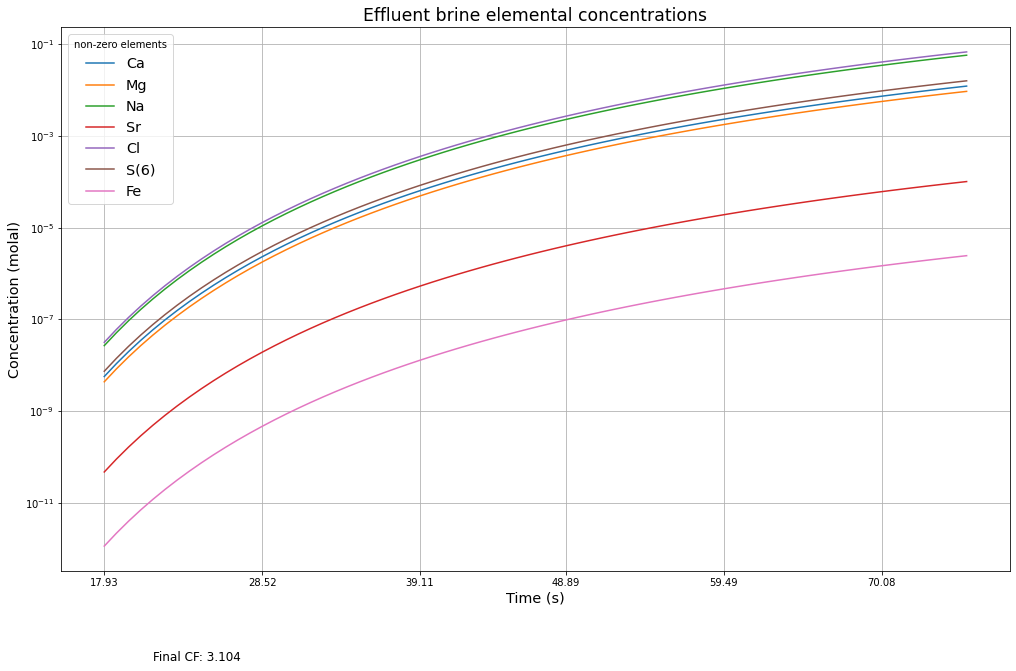




 Molal concentrations of feed elements over 57.9 seconds 
             Ca(mol/kgw)   Mg(mol/kgw)   Na(mol/kgw)   Sr(mol/kgw)  \
time (sec)                                                           
17.93       5.651361e-09  4.336081e-09  2.668380e-08  4.667543e-11   
18.74       1.080033e-08  8.286693e-09  5.099546e-08  8.920150e-11   
19.56       1.975019e-08  1.515360e-08  9.325367e-08  1.631198e-10   
20.37       3.473908e-08  2.665402e-08  1.640261e-07  2.869153e-10   
21.19       5.902715e-08  4.528936e-08  2.787061e-07  4.875140e-10   
...                  ...           ...           ...           ...   
72.53       9.276203e-03  7.117289e-03  4.379907e-02  7.661354e-05   
73.34       9.973467e-03  7.652275e-03  4.709131e-02  8.237235e-05   
74.16       1.070823e-02  8.216029e-03  5.056060e-02  8.844084e-05   
74.97       1.148154e-02  8.809360e-03  5.421190e-02  9.482772e-05   
75.78       1.229443e-02  9.433062e-03  5.805010e-02  1.015415e-04   

             Cl(mol/kgw)  S(

In [87]:
from scipy.constants import nano, milli, day, hour

# run the ROSS model
%run ../rosspy/core.py
ross = ROSSPkg()

# module parameters
quantity_of_modules = 5
module_characteristics = {        
#     'module_diameter_mm': 201,
#     'permeate_tube_diameter_mm': 29,            
#     'module_length_m': 1.016,         
    'permeate_flow_m3_per_day': 1200 / quantity_of_modules,
    'max_feed_flow_m3_per_hour': 1848 / (day/hour),
#     'membrane_thickness_mm': 250 * (nano / milli),
#     'feed_thickness_mm': 0.8636,
#     'active_m2': 37,
#     'permeate_thickness_mm':0.3,
#     'polysulfonic_layer_thickness_mm': 0.05,
#     'support_layer_thickness_mm':0.15
}

# water parameters
custom_water_parameters = {
    'element': {
        'Ca': {
            'concentration (ppm)':720,
            'reference': ''
        },
        'Mg': {
            'concentration (ppm)':335,
            'reference':''
        },
        'Na': {
            'concentration (ppm)':1950,
            'reference':''
        },
        'Sr': {
            'concentration (ppm)':13,
            'reference':''
        },
        'Cl': {
            'concentration (ppm)':3550,
            'reference':''
        },
        'S(6)': {
            'concentration (ppm)':2250,
            'reference':''
        },
        'Fe': {
            'concentration (ppm)':0.2,
            'reference':''
        }
    }
}

# general parameters
operating_system = 'windows'
phreeqc_path = 'C:\\Program Files\\USGS\\phreeqc-3.6.2-15100-x64'
database_selection = 'pitzer'
simulation_type = 'transport'
simulation_title = 'test'
graphical_selection = output_perspective = 'brine'
simulation_time = 75


# create the input file
ross.define_general(operating_system, phreeqc_path, database_selection, simulation_type, simulation_title)
ross.transport(simulation_time, module_characteristics, output_perspective, quantity_of_modules)
ross.reaction()
ross.solutions(custom_water_parameters = custom_water_parameters)
ross.equilibrium_phases(verbose = False)
ross.selected_output()
ross.export(print_block = False)

# ross.input_file(operating_system, phreeqc_path, database_selection, simulation_type, simulation_title, water_selection)

# execute the input file
ross.execute(print_output = False)

# process the simulation results
ross.process_selected_output(selected_output_path, graphical_selection)

# Scaling 